In [3]:
# Preprocess CSV
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "logs/xs-4114_ex11.csv"
CSV_PATH_EX12 = "logs/ex12.csv"
df = pd.read_csv(CSV_PATH)
df_ex12 = pd.read_csv(CSV_PATH_EX12)

# Data cleaning
df["threads"] = pd.to_numeric(df["threads"], errors="coerce")
df["value"]   = pd.to_numeric(df["value"], errors="coerce")
df["metric"]  = pd.to_numeric(df["metric"], errors="coerce")
df["unit"]    = df["unit"].astype(str).str.strip()
df["event"]   = df["event"].astype(str).str.strip()
df["metric_name"] = df["metric_name"].astype(str).str.strip()

df_ex12["threads"] = pd.to_numeric(df_ex12["threads"], errors="coerce")
df_ex12["value"]   = pd.to_numeric(df_ex12["value"], errors="coerce")
df_ex12["metric"]  = pd.to_numeric(df_ex12["metric"], errors="coerce")
df_ex12["unit"]    = df_ex12["unit"].astype(str).str.strip()
df_ex12["event"]   = df_ex12["event"].astype(str).str.strip()
df_ex12["metric_name"] = df_ex12["metric_name"].astype(str).str.strip()

display(df.head(10))
display(df_ex12.head(10))

,jobid,size,threads,value,unit,event,percent_running,raw,percent_enabled,metric,metric_unit,metric_name
0,784190,1300,1,56031905707,nan,cycles,0.06%,18943395194,100.0,NaN,NaN,nan
1,784190,1300,1,130104005024,nan,instructions,0.00%,18943395194,100.0,2.32,insn per cycle,nan
2,784190,1300,1,18938311219,ns,duration_time,0.15%,18950827714,100.0,NaN,NaN,nan
3,784190,1300,1,4394000001,nan,fp_arith_inst_retired.scalar_single,0.00%,18943395194,100.0,NaN,NaN,nan
4,784190,1300,2,56025834761,nan,cycles,0.05%,20048332718,100.0,NaN,NaN,nan
5,784190,1300,2,130108043239,nan,instructions,0.00%,20048332718,100.0,2.32,insn per cycle,nan
6,784190,1300,2,10058955154,ns,duration_time,0.14%,10075004822,100.0,NaN,NaN,nan
7,784190,1300,2,4394000001,nan,fp_arith_inst_retired.scalar_single,0.00%,20048332718,100.0,NaN,NaN,nan
8,784190,1300,3,56027899966,nan,cycles,0.14%,20065301724,100.0,NaN,NaN,nan
9,784190,1300,3,130110623314,nan,instructions,0.00%,20065301724,100.0,2.32,insn per cycle,nan


,jobid,size,threads,value,unit,event,percent_running,raw,percent_enabled,metric,metric_unit,metric_name
0,784254,1300,1,32251045981,nan,cycles,0.05%,10840722790,100.0,NaN,NaN,nan
1,784254,1300,1,101514876296,nan,instructions,0.00%,10840722790,100.0,3.15,insn per cycle,nan
2,784254,1300,1,10911852146,ns,duration_time,0.19%,10849036024,100.0,NaN,NaN,nan
3,784254,1300,1,4394000001,nan,fp_arith_inst_retired.scalar_single,0.00%,10840722790,100.0,NaN,NaN,nan
4,784254,1300,2,32436929317,nan,cycles,0.06%,11532582114,100.0,NaN,NaN,nan
5,784254,1300,2,101519666559,nan,instructions,0.00%,11532582114,100.0,3.13,insn per cycle,nan
6,784254,1300,2,5857547375,ns,duration_time,0.63%,5809138719,100.0,NaN,NaN,nan
7,784254,1300,2,4394000001,nan,fp_arith_inst_retired.scalar_single,0.00%,11532582114,100.0,NaN,NaN,nan
8,784254,1300,3,32485276560,nan,cycles,0.04%,12114245220,100.0,NaN,NaN,nan
9,784254,1300,3,101522018677,nan,instructions,0.00%,12114245220,100.0,3.13,insn per cycle,nan


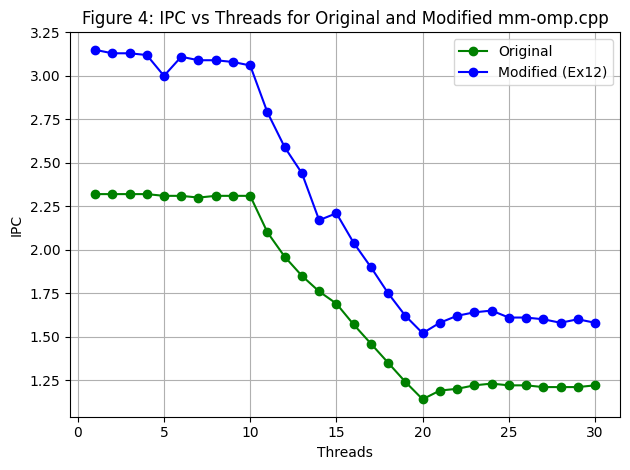

In [7]:
def generate_ipc_graph(df: pd.DataFrame) -> pd.DataFrame:
    # display(df)
    ipc_mask = df["event"].str.contains("instructions", na=False) 
    ipc_df = df[ipc_mask].copy()
    # display(ipc_df)

    ipc_data = (ipc_df[["threads","metric"]]
              .dropna()
              .drop_duplicates(subset=["threads"])
              .sort_values("threads")
              .rename(columns={"metric":"ipc"}))

    return ipc_data
ipc_data = generate_ipc_graph(df)
ipc_data_ex12 = generate_ipc_graph(df_ex12)
plt.figure()
plt.plot(ipc_data["threads"], ipc_data["ipc"], marker="o", color="green")
plt.plot(ipc_data_ex12["threads"], ipc_data_ex12["ipc"], marker="o", color="blue")
plt.legend(["Original", "Modified (Ex12)"])
plt.xlabel("Threads")
plt.ylabel("IPC")
plt.title("Figure 4: IPC vs Threads for Original and Modified mm-omp.cpp")
plt.grid(True)
plt.tight_layout()
plt.show()


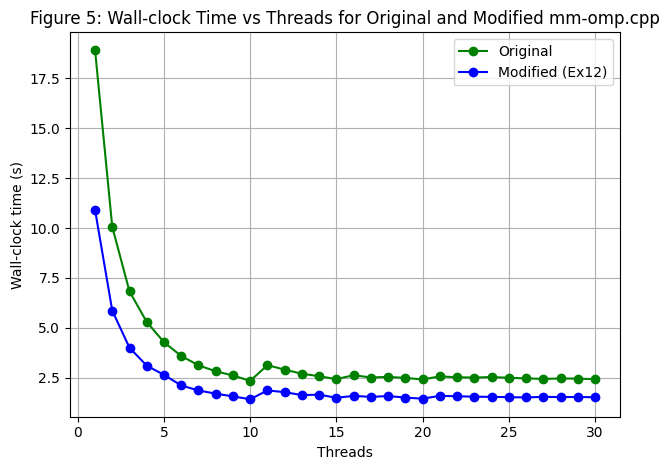

In [8]:
def generate_wallclock_graph(df: pd.DataFrame) -> pd.DataFrame:
    time_mask = (df["event"].str.contains("duration_time", na=False))
    time_df = df[time_mask].copy()
    time_df["seconds"] = time_df["value"] / 1e9

    # display(time_df.head(5))

    time_data = time_df.dropna(subset=["threads","seconds"])
    return time_data

time_data = generate_wallclock_graph(df)
time_data_ex12 = generate_wallclock_graph(df_ex12)
plt.figure()
plt.plot(time_data["threads"], time_data["seconds"], marker="o", color='green')
plt.plot(time_data_ex12["threads"], time_data_ex12["seconds"], marker="o", color='blue')
plt.legend(["Original", "Modified (Ex12)"])
plt.xlabel("Threads")
plt.ylabel("Wall-clock time (s)")
plt.title("Figure 5: Wall-clock Time vs Threads for Original and Modified mm-omp.cpp")
plt.grid(True)
plt.tight_layout()
plt.show()

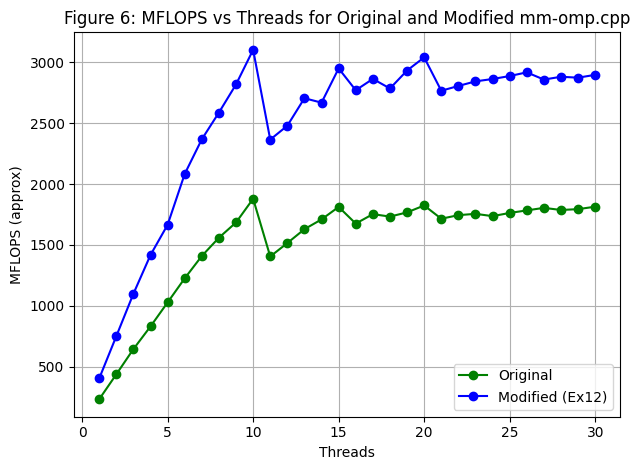

In [9]:
def generate_mflops_graph(df: pd.DataFrame) -> pd.DataFrame:
    # FP instruction counts (proxy for FLOPs)
    fp = df[df["event"].str.contains("fp_arith_inst_retired", case=False, na=False)][
        ["jobid","size","threads","value"]
    ].rename(columns={"value": "fp"})

    # Duration (ns) -> seconds
    tm = df[
        df["event"].str.contains("duration_time", case=False, na=False)
        & df["unit"].astype(str).str.lower().eq("ns")
    ][["jobid","size","threads","value"]].rename(columns={"value": "t_ns"})

    # Pair per-run rows and compute MFLOPS
    m = fp.merge(tm, on=["jobid","size","threads"], how="inner")
    m["mflops"] = (m["fp"] / (m["t_ns"] / 1e9)) / 1e6

    # one row per run, ready to plot
    return m[["threads","mflops"]].sort_values("threads")

mflops = generate_mflops_graph(df)
mflops_ex12 = generate_mflops_graph(df_ex12)

plt.figure()
plt.plot(mflops["threads"], mflops["mflops"], marker="o", color='green')
plt.plot(mflops_ex12["threads"], mflops_ex12["mflops"], marker="o", color='blue')
plt.legend(["Original", "Modified (Ex12)"])
plt.xlabel("Threads"); plt.ylabel("MFLOPS (approx)")
plt.title("Figure 6: MFLOPS vs Threads for Original and Modified mm-omp.cpp")
plt.grid(True) 
plt.tight_layout()
plt.show()
